In [16]:
import gym
import torch
from torch import nn

class Policy(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 2)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.softmax(self.fc2(x), dim=0)
        return x
    
    def sample_action(self, x):
        m = torch.distributions.Categorical(x)
        return m.sample().item()


In [17]:
       
env = gym.make("CartPole-v1")
pi = Policy()
gamma = 0.95
lr = 0.00025
optimizer = torch.optim.Adam(pi.parameters(), lr=lr)
rewards = []

In [22]:

for epi in range(2000):
    
    state = env.reset()
    data = []
    
    while True:
        prob = pi(torch.from_numpy(state).float())
        action = pi.sample_action(prob)
        state, reward, done, info = env.step(action)
        data.append([prob[action], reward])
        
        if done:
            break
            
    R = 0
    optimizer.zero_grad()
    for p, r in data[::-1]:
        R = r + gamma * R
        loss = - R * torch.log(p)
        loss.backward()
    optimizer.step()
    rewards.append(len(data))


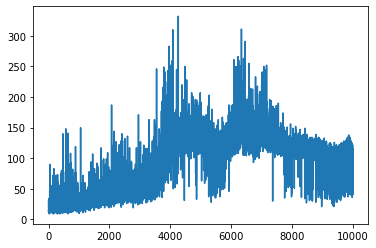

In [24]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(rewards)